# 14. COMPUTER VISION

# 14.1. The Convolutional Classifier

# 14.1.1. COURS

In [1]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/4-KAGGLE/KAGGLE_DEV/KAGGLE_COURS_14-COMPUTER_VISION/input')

In [2]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

In [4]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

# Example - Train a Convnet Classifier

In [9]:
# Step 1 - Load Data

In [6]:
# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [7]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [8]:
import matplotlib.pyplot as plt

# Step 2 - Define Pretrained Base

In [10]:
# L'ensemble de données le plus couramment utilisé pour la préformation est 
# ImageNet, un vaste ensemble de données composé de nombreux types d'images 
# naturelles. Keras inclut dans son module d'applications une variété de modèles
# préformés sur ImageNet. Le modèle préformé que nous utiliserons est appelé 
# VGG16.

In [12]:
pretrained_base = tf.keras.models.load_model(
    'cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

# Step 3 - Attach Head

In [13]:
# Ensuite, on attache la tête de classement. Pour cet exemple, nous utiliserons
# une couche d'unités cachées (la première couche Dense) suivie d'une couche 
# pour transformer les sorties en un score de probabilité pour la classe 1, 
# Camion. La couche Aplatie transforme les sorties bidimensionnelles de la 
# base en entrées unidimensionnelles nécessaires à la tête.

In [14]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

# Step 4 - Train

In [16]:
# Enfin, formons le modèle. Comme il s'agit d'un problème à deux classes, nous
# utiliserons les versions binaires de l'entropie croisée et de la précision. 
# L'optimiseur adam fonctionne généralement bien, donc nous le choisirons aussi

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [ ]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
)

Epoch 1/30
80/80 [==============================] - 227s 3s/step - loss: 0.4772 - binary_accuracy: 0.7745 - val_loss: 0.4190 - val_binary_accuracy: 0.8121
Epoch 2/30
80/80 [==============================] - 221s 3s/step - loss: 0.3509 - binary_accuracy: 0.8505 - val_loss: 0.3554 - val_binary_accuracy: 0.8515
Epoch 3/30
80/80 [==============================] - 223s 3s/step - loss: 0.3086 - binary_accuracy: 0.8712 - val_loss: 0.3254 - val_binary_accuracy: 0.8628
Epoch 4/30
55/80 [===================>..........] - ETA: 34s - loss: 0.2836 - binary_accuracy: 0.8807

In [ ]:
# Lors de la formation d'un réseau neuronal, il est toujours bon d'examiner la 
# perte et les tracés métriques. L'objet histoire contient ces informations 
# dans un dictionnaire history.history. Nous pouvons utiliser des Pandas pour 
# convertir ce dictionnaire en une trame de données et le tracer avec une
# méthode intégrée.

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

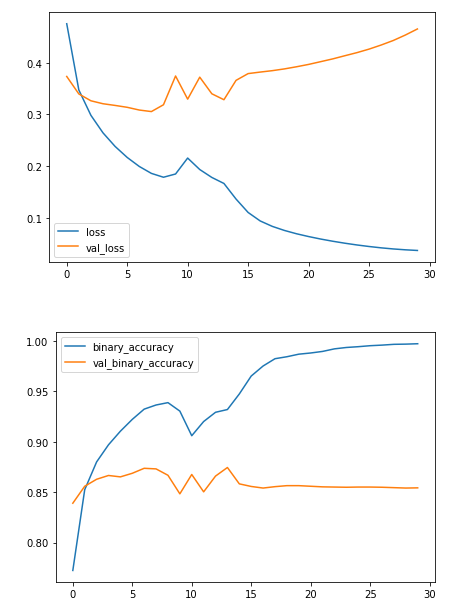

# 14.1.2. EXERCICES

In [1]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/4-KAGGLE/KAGGLE_DEV/KAGGLE_COURS_14-COMPUTER_VISION/input')

In [2]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [4]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

In [5]:
# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [6]:
ds_train_

<BatchDataset shapes: ((None, 128, 128, 3), (None, 1)), types: (tf.uint8, tf.float32)>

In [7]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [8]:
ds_train_

<BatchDataset shapes: ((None, 128, 128, 3), (None, 1)), types: (tf.uint8, tf.float32)>

# 1) Define Pretrained Base

In [9]:
import tensorflow_hub as hub

pretrained_base = tf.keras.models.load_model(
    'cv-course-models/inceptionv1'
)

In [10]:
pretrained_base.trainable = False

# 2) Attach Head

In [11]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    # YOUR CODE HERE. Attach a head of dense layers.
    layers.Dense(units=6, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

# 3) Train

In [12]:
# YOUR CODE HERE: what loss function should you use for a binary
# classification problem? (Your answer for each should be a string.)
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer=optimizer,
    loss = 'binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [13]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
)

Epoch 1/30
80/80 [==============================] - 35s 438ms/step - loss: 0.7006 - binary_accuracy: 0.5419 - val_loss: 0.6893 - val_binary_accuracy: 0.6003
Epoch 2/30
80/80 [==============================] - 34s 430ms/step - loss: 0.6814 - binary_accuracy: 0.6490 - val_loss: 0.6632 - val_binary_accuracy: 0.7468
Epoch 3/30
80/80 [==============================] - 34s 424ms/step - loss: 0.6384 - binary_accuracy: 0.7340 - val_loss: 0.6062 - val_binary_accuracy: 0.7854
Epoch 4/30
80/80 [==============================] - 34s 430ms/step - loss: 0.5872 - binary_accuracy: 0.7799 - val_loss: 0.5632 - val_binary_accuracy: 0.8125
Epoch 5/30
80/80 [==============================] - 35s 433ms/step - loss: 0.5522 - binary_accuracy: 0.8013 - val_loss: 0.5348 - val_binary_accuracy: 0.8284
Epoch 6/30
80/80 [==============================] - 35s 440ms/step - loss: 0.5273 - binary_accuracy: 0.8165 - val_loss: 0.5126 - val_binary_accuracy: 0.8313
Epoch 7/30
80/80 [==============================] - 36s 44

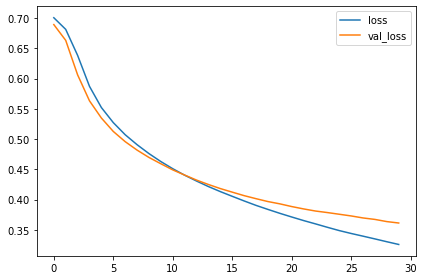

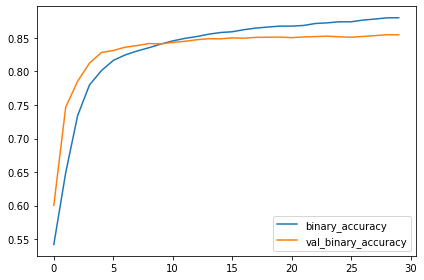

In [14]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();